In [1]:
import load_data as ld
from pathlib import Path
import pickle
import hyperparameter_tuning as ht
from slope_calculation import *

In [2]:
def find_number_of_clusters(fit_data, path):
    error = []
    cls = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    for i in cls:
        som_dimension = (i, 1)
        _, tuned_par = ht.begin_fine_tune(som_dimension, fit_data)
        print('best: {}'.format(tuned_par))

        neighbourhood = tuned_par['sig']
        learning_rate = tuned_par['learning_rate']

        quantization_error, _, _ = cluster_with_som(som_dimension, np.array(fit_data), neighbourhood, learning_rate)
        error.append(quantization_error)

    error = error/max(error)
    plt.figure()
    plt.plot(cls, error, '-*')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Quantization Error (Normalized)')
    plt.xticks(cls, cls)
    plt.savefig(path+'Define Clusters.svg')
    plt.savefig(path+'Define Clusters.png')
    plt.show()

In [3]:
parent_folder = Path(os.getcwd()).parent.absolute()
data_path = os.path.join(parent_folder, "Data/FLEMENGHO/Strain curves - Sfile16 (Filtered)")
save_data_path = os.path.join(parent_folder,"Results/SOM/FLEMENGHO/")

if not os.path.exists(save_data_path):
    os.makedirs(save_data_path)

avc_files = ["Data/FLEMENGHO/AVC time_16_all.xlsx",
             "Data/FLEMENGHO/Patients Without AVC_TK.xlsx"]
marker_file = ["Data/FLEMENGHO/Patients for manual annotation of markers_TK.xlsx"]

In [4]:
original_data, data, patient_id, interval = ld.read_data(data_path)
excluded_patients1, avc_times = ld.read_avc_time(parent_folder, avc_files)
excluded_patients2, p_wave_times = ld.read_p_wave_data(parent_folder, marker_file)

original_data, data, patient_id, interval = exclude_patients(excluded_patients1, excluded_patients2, original_data,
                                                             data, patient_id, interval)
decision = "peak"
aligned_ecg, deformation, reference_index, normalized_time, reference_time = get_aligned_signals(original_data,
                                                                                                 decision, interval,
                                                                                                 patient_id, avc_times,
                                                                                                 p_wave_times)

deformation = np.array(deformation)


C:\Users\vagge\Desktop\Deformation Curves\SOM\load_data.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_excel(f, usecols=(0, 1)), ignore_index=True)
C:\Users\vagge\Desktop\Deformation Curves\SOM\load_data.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_excel(f, usecols=(0, 1)), ignore_index=True)
C:\Users\vagge\Desktop\Deformation Curves\SOM\load_data.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_excel(f, usecols=(0, 1, 2)), ignore_index=True)


Start slicing data
Start Alignment


  4%|▍         | 4/100 [00:01<00:27,  3.55trial/s, best loss: 55.20239154578413]

c:\users\vagge\desktop\deformation curves\som\venv\lib\site-packages\numpy\linalg\linalg.py:2547: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))

c:\users\vagge\desktop\deformation curves\som\venv\lib\site-packages\numpy\linalg\linalg.py:2546: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real

c:\users\vagge\desktop\deformation curves\som\venv\lib\site-packages\minisom.py:338: RuntimeWarning: invalid value encountered in add
  self._weights += einsum('ij, ijk->ijk', g, x-self._weights)



  5%|▌         | 5/100 [00:01<00:29,  3.25trial/s, best loss: 55.20239154578413]

c:\users\vagge\desktop\deformation curves\som\venv\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)



100%|██████████| 100/100 [00:34<00:00,  2.93trial/s, best loss: 54.08228054433312]
best: {'learning_rate': 0.16749082466359655, 'sig': 0.3961782375197926}
100%|██████████| 100/100 [00:32<00:00,  3.06trial/s, best loss: 48.55411995200414]
best: {'learning_rate': 0.11287686891376608, 'sig': 0.16051589952759915}
 14%|█▍        | 14/100 [00:04<00:27,  3.16trial/s, best loss: 45.21052552477497]

c:\users\vagge\desktop\deformation curves\som\venv\lib\site-packages\minisom.py:511: RuntimeWarning: overflow encountered in power
  weights_flat_sq = power(weights_flat, 2).sum(axis=1, keepdims=True)



100%|██████████| 100/100 [00:31<00:00,  3.16trial/s, best loss: 44.59587926979215]
best: {'learning_rate': 0.10875643745560286, 'sig': 0.21258084430758228}
100%|██████████| 100/100 [00:32<00:00,  3.11trial/s, best loss: 42.051649157769766]
best: {'learning_rate': 0.1128282514172814, 'sig': 0.9533839402736686}
100%|██████████| 100/100 [00:34<00:00,  2.86trial/s, best loss: 40.45419659106718]
best: {'learning_rate': 0.14626124729170925, 'sig': 0.4081195236710261}
100%|██████████| 100/100 [00:36<00:00,  2.77trial/s, best loss: 38.932124398040074]
best: {'learning_rate': 0.13937863283788618, 'sig': 0.4316908425810575}
100%|██████████| 100/100 [00:34<00:00,  2.93trial/s, best loss: 37.52891227088649]
best: {'learning_rate': 0.10023618439482737, 'sig': 0.3277201211904037}
100%|██████████| 100/100 [00:33<00:00,  2.97trial/s, best loss: 36.33802318759691]
best: {'learning_rate': 0.13116609043180735, 'sig': 0.41136812189786964}
100%|██████████| 100/100 [00:35<00:00,  2.82trial/s, best loss: 35.

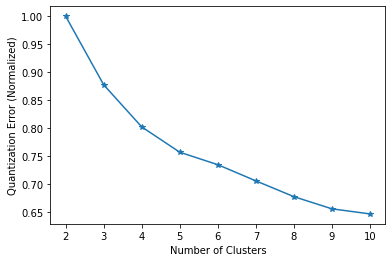

In [5]:
# number of clusters is identical to the number of neurons in SOM grid
find_number_of_clusters(deformation, save_data_path)

In [6]:
# "grid" variable should be adjusted according to the results from previous step
grid = (5, 1)
trials, best = ht.begin_fine_tune(grid, deformation)
print('best: {}'.format(best))

#train the SOM network with the best learning rate and sigma parameter
sig = best['sig']
lr = best['learning_rate']
_, model, _ = cluster_with_som(grid, deformation, sig, lr)

# save the som model
with open(os.path.join(parent_folder, "Results/SOM/som.p"), 'wb') as outfile:
    pickle.dump(model, outfile)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

c:\users\vagge\desktop\deformation curves\som\venv\lib\site-packages\numpy\linalg\linalg.py:2547: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))

c:\users\vagge\desktop\deformation curves\som\venv\lib\site-packages\numpy\linalg\linalg.py:2546: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real

c:\users\vagge\desktop\deformation curves\som\venv\lib\site-packages\minisom.py:338: RuntimeWarning: invalid value encountered in add
  self._weights += einsum('ij, ijk->ijk', g, x-self._weights)



  1%|          | 1/100 [00:00<00:31,  3.12trial/s, best loss=?]

c:\users\vagge\desktop\deformation curves\som\venv\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)



100%|██████████| 100/100 [00:30<00:00,  3.30trial/s, best loss: 42.12747917428807]
best: {'learning_rate': 0.1066707942746028, 'sig': 0.5669348737448403}


In [6]:
# "grid" variable should be adjusted according to the results from step 5
grid = (5, 1)
#load the saved som model
clustering_model = pickle.load(open(os.path.join(parent_folder, "Results/SOM/som.p"), 'rb'))
winner_coordinates = np.array([clustering_model.winner(x) for x in deformation]).T
clusters = np.ravel_multi_index(winner_coordinates, grid)

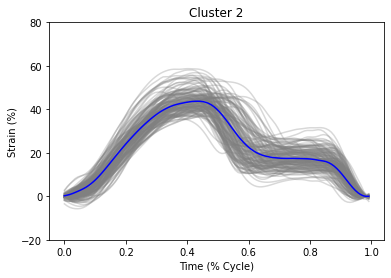

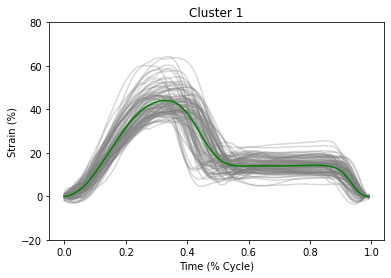

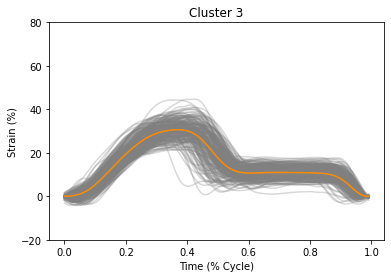

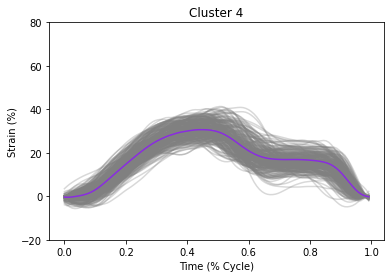

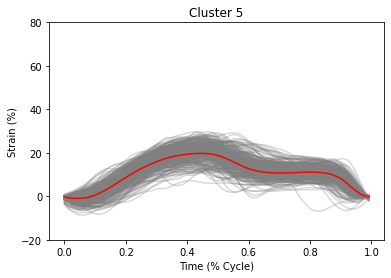

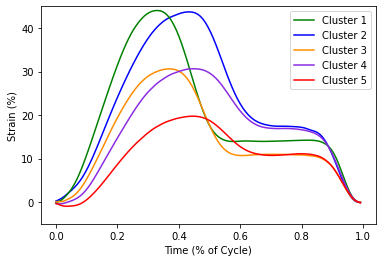

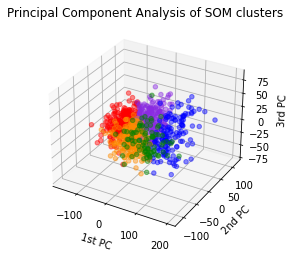

C:\Users\vagge\Desktop\Deformation Curves\SOM\utils.py:146: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\vagge\Desktop\Deformation Curves\SOM\utils.py:155: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

100%|██████████| 944/944 [00:56<00:00, 16.64it/s]


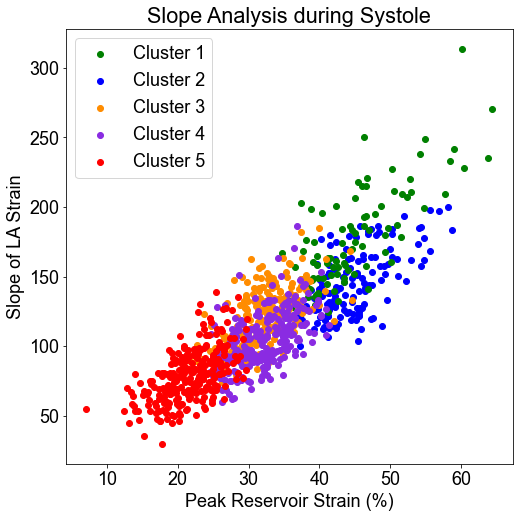

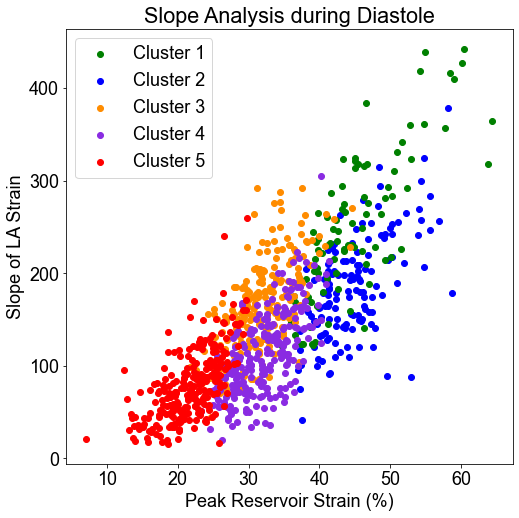

In [7]:
# groups the patients' ids per cluster. Returns a list
clustered_id = analyze_patient(clusters, patient_id)

# writes an excel file with the patient's ID and its assigned cluster label
write2excel(clusters, patient_id, save_data_path)

# plots the strain traces grouped per cluster with Matplotlib and plotly. Matplotlib produces png and svg files.
visualize_clustering_results(clustering_model, reference_time, deformation, clustered_id,
                             clusters, patient_id, save_data_path)

# plot the first three principal components of the strain curves
plot_pca(clusters, deformation, patient_id, save_data_path)

# plots the gradient of the Strain traces with Matplotlib and plotly.
plot_gradients(deformation, reference_time, clusters, clustered_id, patient_id, save_data_path)

# calculate the slopes of the strain curves by fitting a linear Regression model
systolic, diastolic = calculate_slopes(deformation, reference_time, patient_id, save_data_path)

# plots the slopes of the Strain traces
plot_slopes(deformation, clusters, clustered_id, patient_id, systolic, diastolic, save_data_path)
